In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-28 10:25:51.469577


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1171.5708)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 32


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5551)tensor(7.3587)tensor(5.1007)tensor(6.2414)tensor(4.8904)tensor(2.8925)tensor(4.4701)tensor(4.1037)tensor(6.5286)tensor(4.6591)tensor(4.3405)tensor(3.8424)tensor(9.4393)tensor(4.5292)tensor(5.5882)tensor(4.0295)tensor(6.3990)tensor(2.9444)tensor(6.1813)tensor(3.4591)tensor(3.4435)tensor(4.5114)tensor(8.3005)tensor(5.4922)tensor(5.1433)tensor(5.4709)tensor(6.5018)tensor(8.9497)tensor(3.9941)tensor(4.3565)tensor(5.9241)tensor(4.7804)tensor(3.6365)tensor(4.7080)tensor(8.0531)tensor(3.7576)tensor(6.6630)tensor(2.4981)tensor(4.5347)tensor(4.8187)tensor(3.8487)tensor(2.8303)tensor(3.2356)tensor(3.9831)tensor(3.3124)tensor(3.8845)tensor(6.3221)tensor(3.5978)tensor(5.7582)tensor(3.4766)tensor(4.8072)tensor(4.7992)tensor(2.6046)tensor(4.5801)tensor(6.9730)tensor(3.2442)tensor(4.5405)tensor(2.8318)tensor(8.8840)tensor(5.4158)tensor(7.0567)tensor(4.4412)tensor(3.1098)tensor(7.6374)tensor(4.0861)tensor(9.2423)tensor(6.2062)tensor(6.0323)tensor(3.6861)tensor(6.2504)tensor(6.2407)tensor

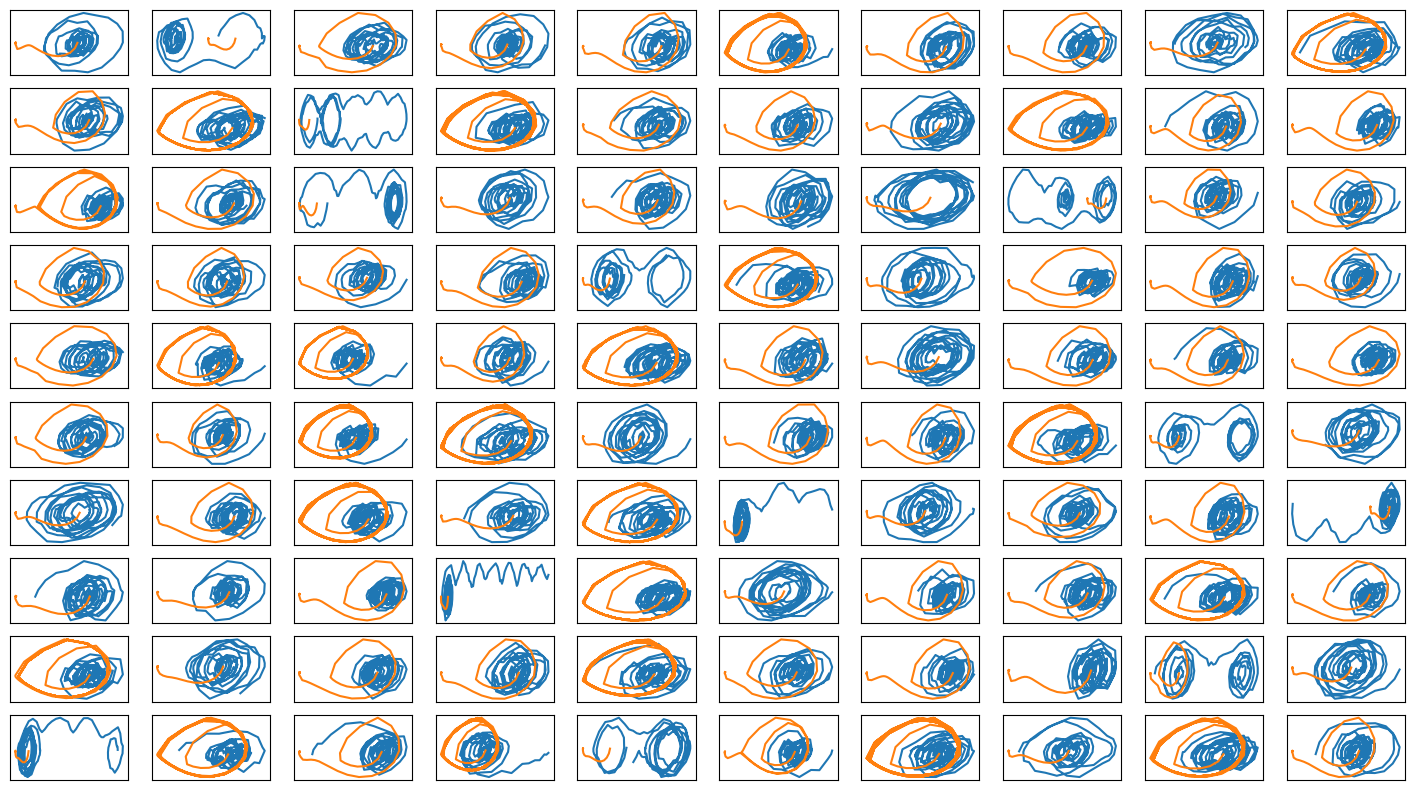

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 511.09132  validloss 867.13624±0.00000  bestvalidloss 867.13624  last_update 0
train: iter 1  trainloss 331.37892  validloss 391.40932±0.00000  bestvalidloss 391.40932  last_update 0
train: iter 2  trainloss 244.21251  validloss 295.32008±0.00000  bestvalidloss 295.32008  last_update 0
train: iter 3  trainloss 151.61215  validloss 216.67699±0.00000  bestvalidloss 216.67699  last_update 0
train: iter 4  trainloss 59.81089  validloss 99.54206±0.00000  bestvalidloss 99.54206  last_update 0
train: iter 5  trainloss 29.35905  validloss 25.81030±0.00000  bestvalidloss 25.81030  last_update 0
train: iter 6  trainloss -11.58500  validloss -29.62501±0.00000  bestvalidloss -29.62501  last_update 0
train: iter 7  trainloss -11.27049  validloss 63.11373±0.00000  bestvalidloss -29.62501  last_update 1
train: iter 8  trainloss -89.53022  validloss -18.92756±0.00000  bestvalidloss -29.62501  last_update 2
train: iter 9  trainloss -119.82750  validloss -148.

train: iter 77  trainloss -509.89175  validloss -553.98730±0.00000  bestvalidloss -558.43578  last_update 1
train: iter 78  trainloss -522.02899  validloss -564.72980±0.00000  bestvalidloss -564.72980  last_update 0
train: iter 79  trainloss -501.64883  validloss -567.16985±0.00000  bestvalidloss -567.16985  last_update 0
train: iter 80  trainloss -526.66576  validloss -523.05104±0.00000  bestvalidloss -567.16985  last_update 1
train: iter 81  trainloss -528.02914  validloss -524.99192±0.00000  bestvalidloss -567.16985  last_update 2
train: iter 82  trainloss -534.09045  validloss -558.24997±0.00000  bestvalidloss -567.16985  last_update 3
train: iter 83  trainloss -534.74225  validloss -565.45182±0.00000  bestvalidloss -567.16985  last_update 4
train: iter 84  trainloss -525.03889  validloss -557.62149±0.00000  bestvalidloss -567.16985  last_update 5
train: iter 85  trainloss -544.39497  validloss -574.68255±0.00000  bestvalidloss -574.68255  last_update 0
train: iter 86  trainloss -5

train: iter 153  trainloss -697.72778  validloss -724.72954±0.00000  bestvalidloss -724.72954  last_update 0
train: iter 154  trainloss -683.89885  validloss -673.28256±0.00000  bestvalidloss -724.72954  last_update 1
train: iter 155  trainloss -686.47363  validloss -698.82892±0.00000  bestvalidloss -724.72954  last_update 2
train: iter 156  trainloss -704.34105  validloss -708.67745±0.00000  bestvalidloss -724.72954  last_update 3
train: iter 157  trainloss -704.18431  validloss -703.72833±0.00000  bestvalidloss -724.72954  last_update 4
train: iter 158  trainloss -702.47920  validloss -723.13401±0.00000  bestvalidloss -724.72954  last_update 5
train: iter 159  trainloss -706.10028  validloss -692.94113±0.00000  bestvalidloss -724.72954  last_update 6
train: iter 160  trainloss -711.43956  validloss -726.38453±0.00000  bestvalidloss -726.38453  last_update 0
train: iter 161  trainloss -718.34401  validloss -671.41193±0.00000  bestvalidloss -726.38453  last_update 1
train: iter 162  tr

train: iter 229  trainloss -691.03840  validloss -757.86327±0.00000  bestvalidloss -768.20478  last_update 15
train: iter 230  trainloss -734.67610  validloss -702.03908±0.00000  bestvalidloss -768.20478  last_update 16
train: iter 231  trainloss -736.57804  validloss -751.86317±0.00000  bestvalidloss -768.20478  last_update 17
train: iter 232  trainloss -739.06257  validloss -758.17282±0.00000  bestvalidloss -768.20478  last_update 18
train: iter 233  trainloss -722.21275  validloss -712.20744±0.00000  bestvalidloss -768.20478  last_update 19
train: iter 234  trainloss -734.54274  validloss -752.22215±0.00000  bestvalidloss -768.20478  last_update 20
train: iter 235  trainloss -730.73427  validloss -744.90341±0.00000  bestvalidloss -768.20478  last_update 21
train: iter 236  trainloss -744.89950  validloss -767.39898±0.00000  bestvalidloss -768.20478  last_update 22
train: iter 237  trainloss -742.75404  validloss -737.47567±0.00000  bestvalidloss -768.20478  last_update 23
train: ite

train: iter 304  trainloss -764.89185  validloss -769.14503±0.00000  bestvalidloss -783.79341  last_update 16
train: iter 305  trainloss -744.39473  validloss -749.13554±0.00000  bestvalidloss -783.79341  last_update 17
train: iter 306  trainloss -752.85533  validloss -769.29586±0.00000  bestvalidloss -783.79341  last_update 18
train: iter 307  trainloss -748.48472  validloss -769.69536±0.00000  bestvalidloss -783.79341  last_update 19
train: iter 308  trainloss -745.24366  validloss -779.87148±0.00000  bestvalidloss -783.79341  last_update 20
train: iter 309  trainloss -754.20715  validloss -772.21420±0.00000  bestvalidloss -783.79341  last_update 21
train: iter 310  trainloss -759.08219  validloss -758.45425±0.00000  bestvalidloss -783.79341  last_update 22
train: iter 311  trainloss -752.53422  validloss -772.28944±0.00000  bestvalidloss -783.79341  last_update 23
train: iter 312  trainloss -752.05110  validloss -770.49104±0.00000  bestvalidloss -783.79341  last_update 24
train: ite

train: iter 379  trainloss -764.55288  validloss -768.41557±0.00000  bestvalidloss -792.69158  last_update 29
train: iter 380  trainloss -755.34380  validloss -792.35796±0.00000  bestvalidloss -792.69158  last_update 30
train: iter 381  trainloss -740.29827  validloss -780.78880±0.00000  bestvalidloss -792.69158  last_update 31
train: iter 382  trainloss -750.30614  validloss -780.18532±0.00000  bestvalidloss -792.69158  last_update 32
train: iter 383  trainloss -765.46304  validloss -770.73485±0.00000  bestvalidloss -792.69158  last_update 33
train: iter 384  trainloss -750.58775  validloss -740.18736±0.00000  bestvalidloss -792.69158  last_update 34
train: iter 385  trainloss -747.10140  validloss -785.65818±0.00000  bestvalidloss -792.69158  last_update 35
train: iter 386  trainloss -753.66083  validloss -776.80501±0.00000  bestvalidloss -792.69158  last_update 36
train: iter 387  trainloss -750.90160  validloss -728.12357±0.00000  bestvalidloss -792.69158  last_update 37
train: ite

train: iter 454  trainloss -766.51151  validloss -774.50122±0.00000  bestvalidloss -798.49728  last_update 47
train: iter 455  trainloss -765.81751  validloss -789.84312±0.00000  bestvalidloss -798.49728  last_update 48
train: iter 456  trainloss -775.69802  validloss -777.96724±0.00000  bestvalidloss -798.49728  last_update 49
train: iter 457  trainloss -766.94190  validloss -786.78572±0.00000  bestvalidloss -798.49728  last_update 50
train: iter 458  trainloss -748.17572  validloss -750.77354±0.00000  bestvalidloss -798.49728  last_update 51
train: iter 459  trainloss -753.94418  validloss -792.25082±0.00000  bestvalidloss -798.49728  last_update 52
train: iter 460  trainloss -769.14336  validloss -791.17873±0.00000  bestvalidloss -798.49728  last_update 53
train: iter 461  trainloss -744.24755  validloss -797.41710±0.00000  bestvalidloss -798.49728  last_update 54
train: iter 462  trainloss -778.53027  validloss -788.55033±0.00000  bestvalidloss -798.49728  last_update 55
train: ite

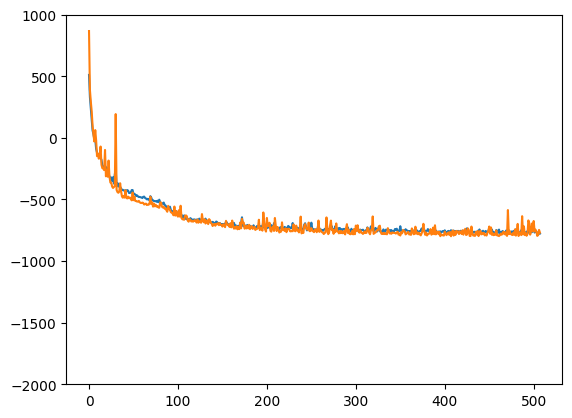

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  predict diverge [ 5.12520605 61.12502545] [ 1.12690099 46.92974601] [89.06856  20.154602] [44.53428  10.077301] sim_timestep 195
2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  2

実環境方策rollout vs Sim環境方策rollout


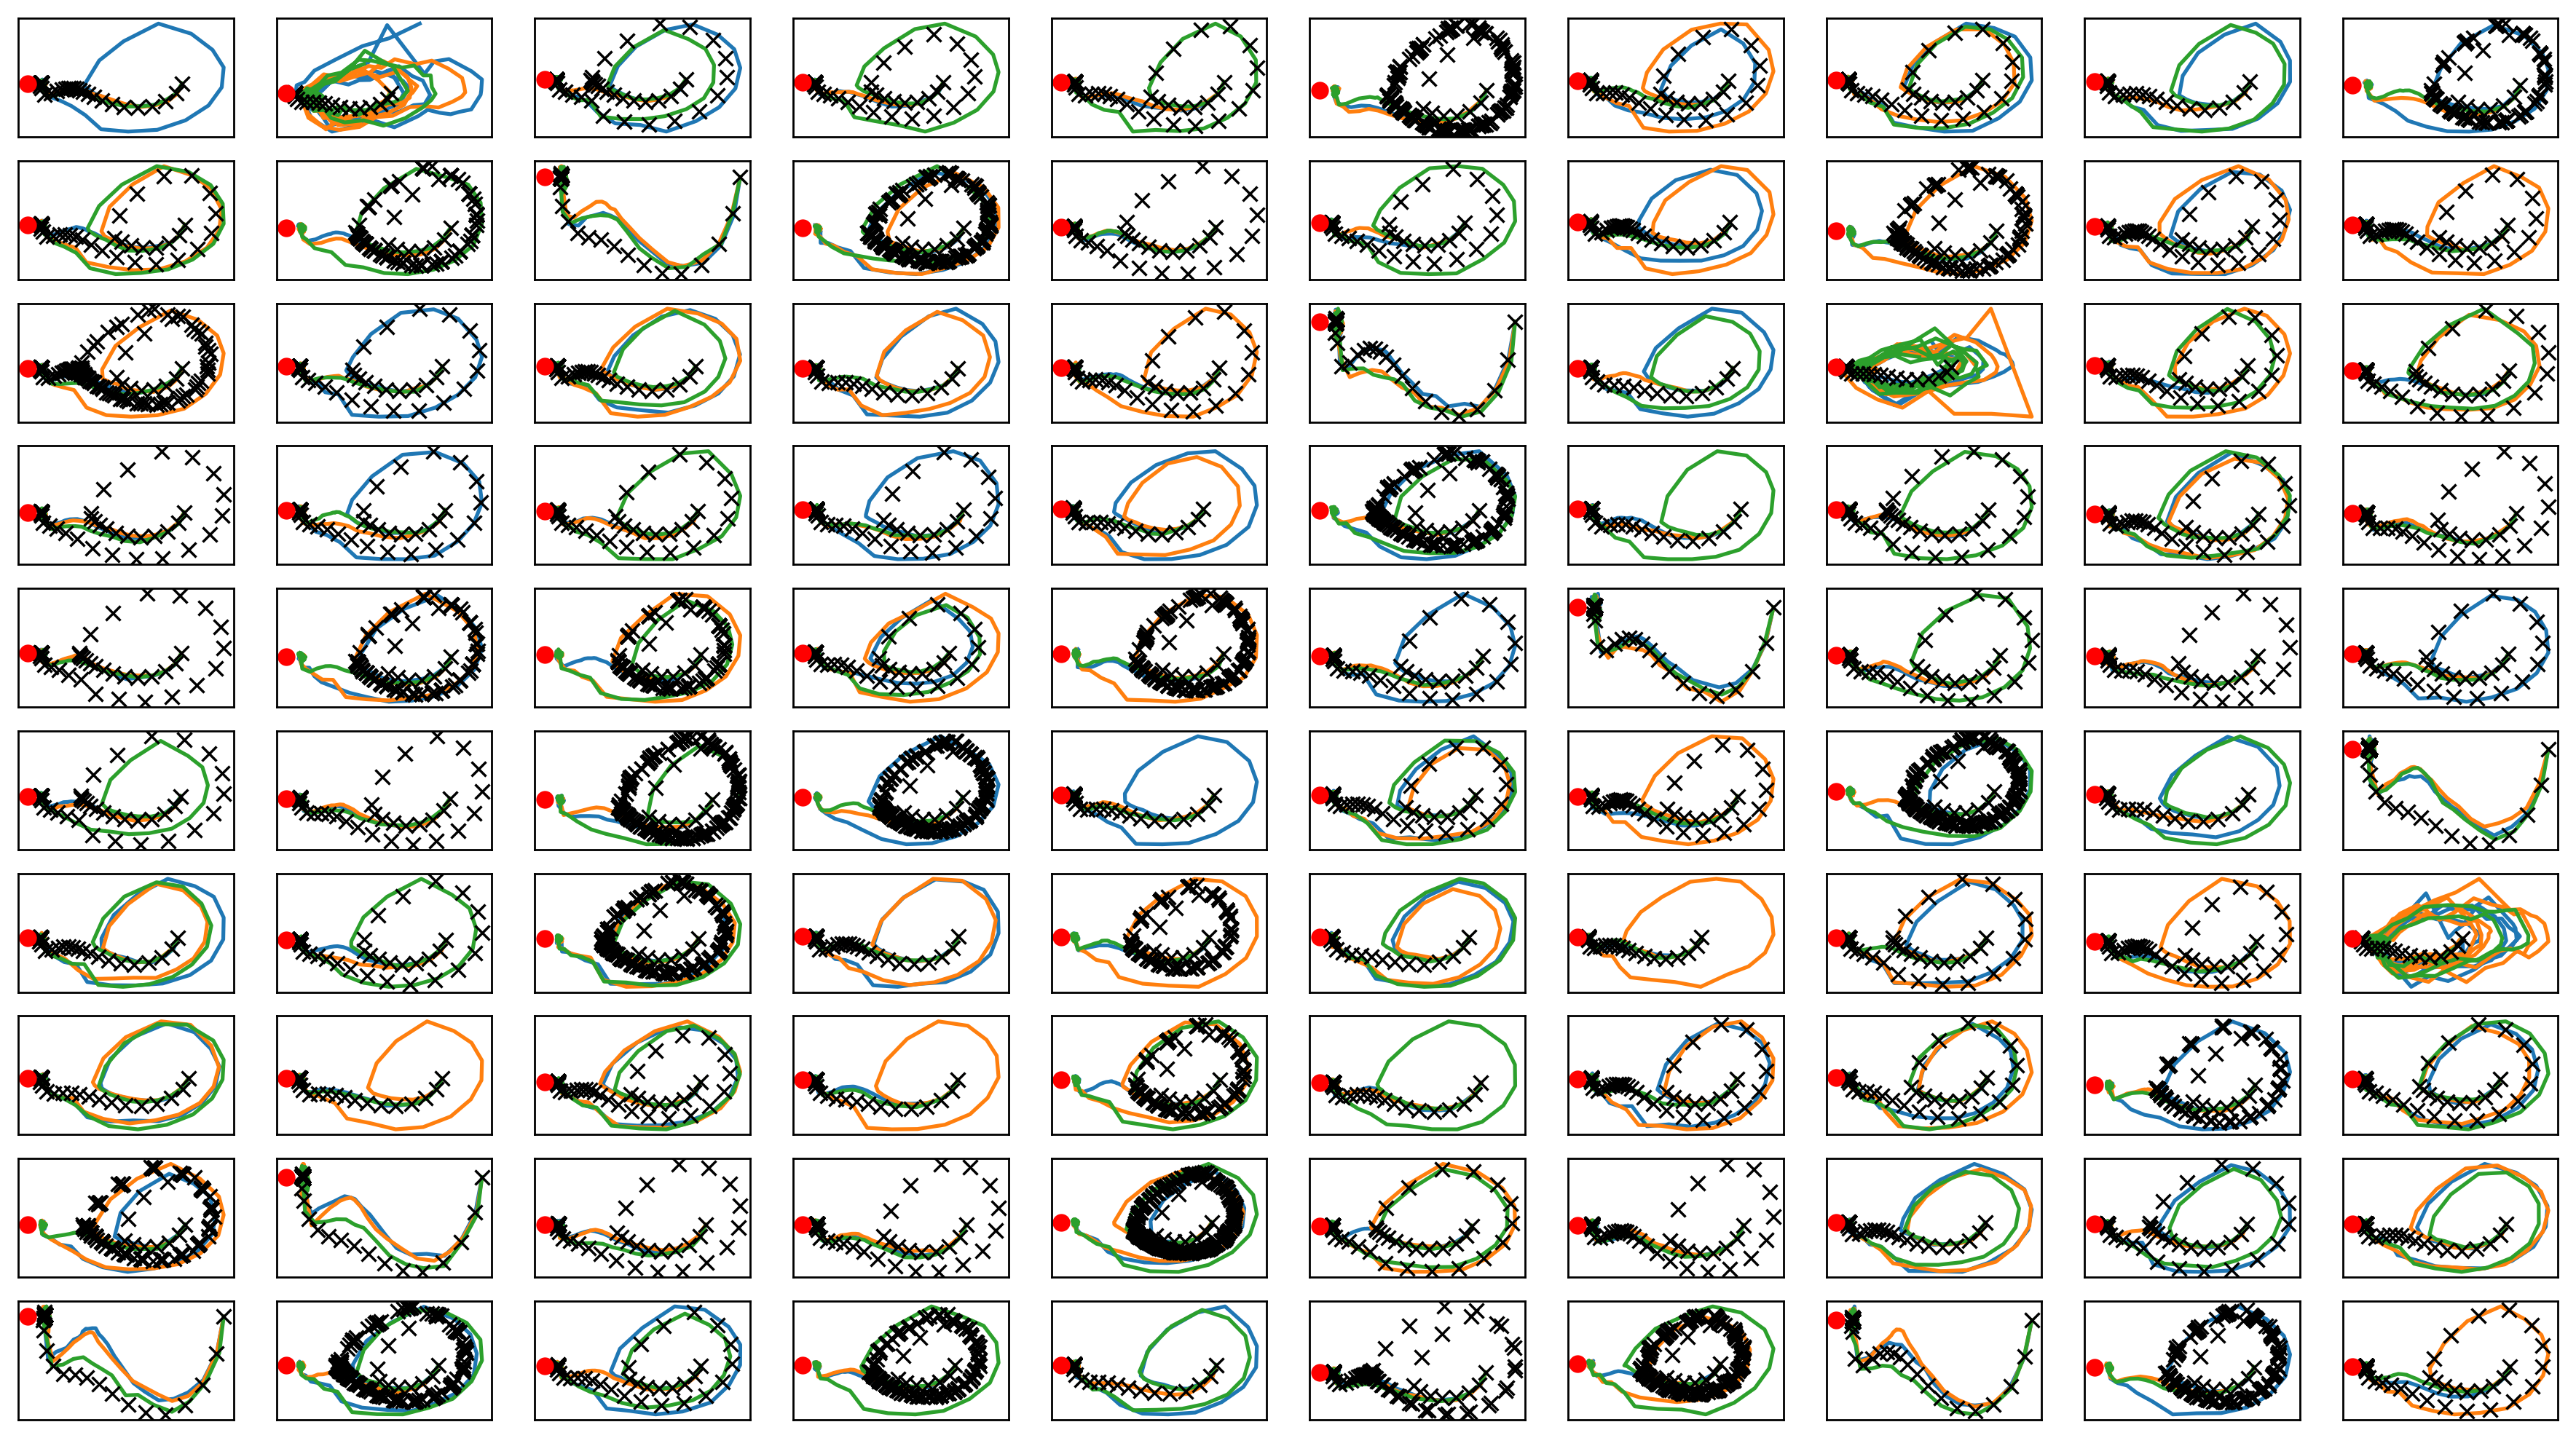

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

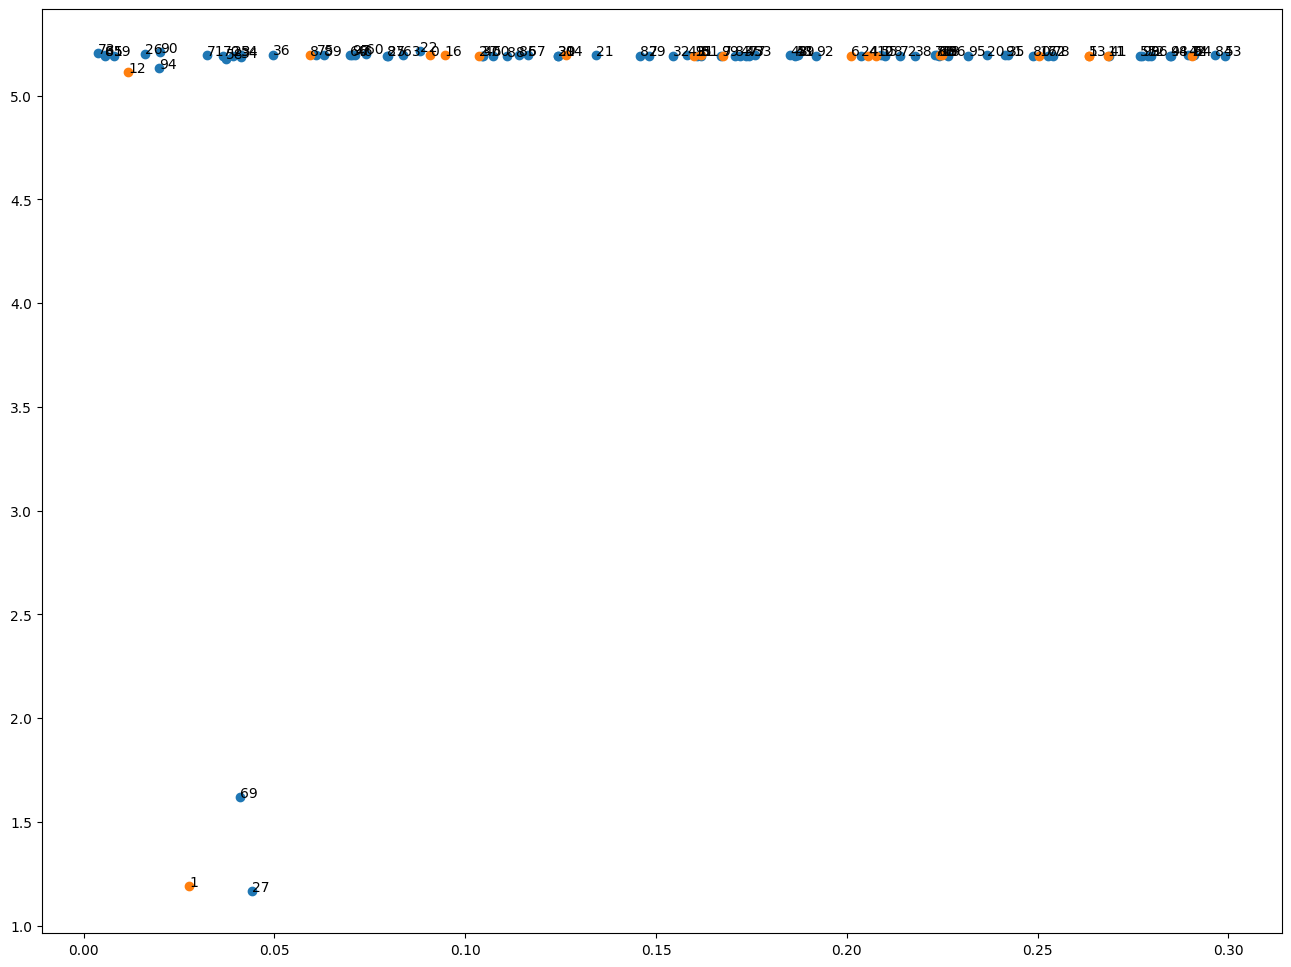

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


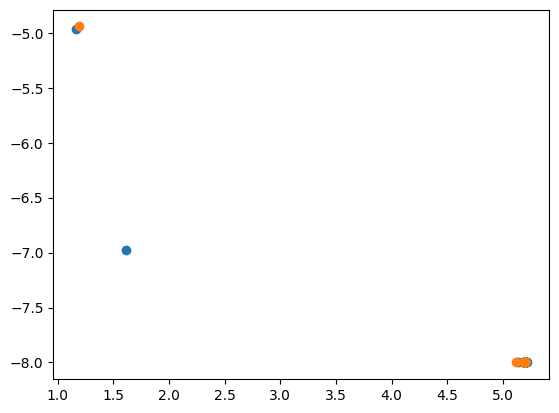

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 13.44923  validloss 13.73936±0.00000  bestvalidloss 13.73936  last_update 0
train: iter 1  trainloss 12.21484  validloss 12.50456±0.00000  bestvalidloss 12.50456  last_update 0
train: iter 2  trainloss 11.17820  validloss 11.38469±0.00000  bestvalidloss 11.38469  last_update 0
train: iter 3  trainloss 10.28344  validloss 10.43954±0.00000  bestvalidloss 10.43954  last_update 0
train: iter 4  trainloss 9.47978  validloss 9.61875±0.00000  bestvalidloss 9.61875  last_update 0
train: iter 5  trainloss 8.80843  validloss 8.91602±0.00000  bestvalidloss 8.91602  last_update 0
train: iter 6  trainloss 8.20020  validloss 8.28409±0.00000  bestvalidloss 8.28409  last_update 0
train: iter 7  trainloss 7.66881  validloss 7.75464±0.00000  bestvalidloss 7.75464  last_update 0
train: iter 8  trainloss 7.20220  validloss 7.25693±0.00000  bestvalidloss 7.25693  last_update 0
train: iter 9  trainloss 6.78063  validloss 6.81230±0.00000  bestvalidloss 6.81230  last_update 0
train: i

train: iter 85  trainloss 1.67559  validloss 1.73770±0.00000  bestvalidloss 1.73770  last_update 0
train: iter 86  trainloss 1.64409  validloss 1.69324±0.00000  bestvalidloss 1.69324  last_update 0
train: iter 87  trainloss 1.60962  validloss 1.66646±0.00000  bestvalidloss 1.66646  last_update 0
train: iter 88  trainloss 1.57158  validloss 1.63400±0.00000  bestvalidloss 1.63400  last_update 0
train: iter 89  trainloss 1.53531  validloss 1.60063±0.00000  bestvalidloss 1.60063  last_update 0
train: iter 90  trainloss 1.50284  validloss 1.56626±0.00000  bestvalidloss 1.56626  last_update 0
train: iter 91  trainloss 1.46677  validloss 1.54199±0.00000  bestvalidloss 1.54199  last_update 0
train: iter 92  trainloss 1.42914  validloss 1.53419±0.00000  bestvalidloss 1.53419  last_update 0
train: iter 93  trainloss 1.39685  validloss 1.49261±0.00000  bestvalidloss 1.49261  last_update 0
train: iter 94  trainloss 1.36118  validloss 1.46641±0.00000  bestvalidloss 1.46641  last_update 0
train: ite

train: iter 167  trainloss 0.91450  validloss 1.37922±0.00000  bestvalidloss 1.22698  last_update 49
train: iter 168  trainloss 0.93039  validloss 1.41007±0.00000  bestvalidloss 1.22698  last_update 50
train: iter 169  trainloss 0.90576  validloss 1.36882±0.00000  bestvalidloss 1.22698  last_update 51
train: iter 170  trainloss 0.90243  validloss 1.36869±0.00000  bestvalidloss 1.22698  last_update 52
train: iter 171  trainloss 0.91988  validloss 1.38645±0.00000  bestvalidloss 1.22698  last_update 53
train: iter 172  trainloss 0.91584  validloss 1.32023±0.00000  bestvalidloss 1.22698  last_update 54
train: iter 173  trainloss 0.93360  validloss 1.36561±0.00000  bestvalidloss 1.22698  last_update 55
train: iter 174  trainloss 0.90693  validloss 1.35288±0.00000  bestvalidloss 1.22698  last_update 56
train: iter 175  trainloss 0.91824  validloss 1.30392±0.00000  bestvalidloss 1.22698  last_update 57
train: iter 176  trainloss 0.92170  validloss 1.37490±0.00000  bestvalidloss 1.22698  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 5.0871, -0.2902], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 16.70082  validloss 21.08628±0.00000  bestvalidloss 21.08628  last_update 0
train: iter 1  trainloss 9.95484  validloss 14.02720±0.00000  bestvalidloss 14.02720  last_update 0
train: iter 2  trainloss 5.54672  validloss 7.59788±0.00000  bestvalidloss 7.59788  last_update 0
train: iter 3  trainloss 3.89204  validloss 4.82601±0.00000  bestvalidloss 4.82601  last_update 0
train: iter 4  trainloss 3.19688  validloss 3.57885±0.00000  bestvalidloss 3.57885  last_update 0
train: iter 5  trainloss 2.89885  validloss 3.03853±0.00000  bestvalidloss 3.03853  last_update 0
train: iter 6  trainloss 2.70402  validloss 2.79593±0.00000  bestvalidloss 2.79593  last_update 0
train: iter 7  trainloss 2.57363  validloss 2.55536±0.00000  bestvalidloss 2.55536  last_update 0
train: iter 8  trainloss 2.43195  validloss 2.43297±0.00000  bestvalidloss 2.43297  last_update 0
train: iter 9  trainloss 2.38846  validloss 2.29353±0.00000  bestvalidloss 2.29353  last_update 0
train: iter 10 

train: iter 84  trainloss 1.87665  validloss 1.21176±0.00000  bestvalidloss 1.18589  last_update 9
train: iter 85  trainloss 1.86790  validloss 1.18859±0.00000  bestvalidloss 1.18589  last_update 10
train: iter 86  trainloss 1.87931  validloss 1.15683±0.00000  bestvalidloss 1.15683  last_update 0
train: iter 87  trainloss 1.87350  validloss 1.21931±0.00000  bestvalidloss 1.15683  last_update 1
train: iter 88  trainloss 1.86476  validloss 1.18423±0.00000  bestvalidloss 1.15683  last_update 2
train: iter 89  trainloss 1.86986  validloss 1.24274±0.00000  bestvalidloss 1.15683  last_update 3
train: iter 90  trainloss 1.83146  validloss 1.23818±0.00000  bestvalidloss 1.15683  last_update 4
train: iter 91  trainloss 1.85253  validloss 1.18593±0.00000  bestvalidloss 1.15683  last_update 5
train: iter 92  trainloss 1.87056  validloss 1.22833±0.00000  bestvalidloss 1.15683  last_update 6
train: iter 93  trainloss 1.88742  validloss 1.24595±0.00000  bestvalidloss 1.15683  last_update 7
train: it

train: iter 167  trainloss 1.85712  validloss 1.20173±0.00000  bestvalidloss 1.14199  last_update 41
train: iter 168  trainloss 1.85039  validloss 1.19063±0.00000  bestvalidloss 1.14199  last_update 42
train: iter 169  trainloss 1.87098  validloss 1.19900±0.00000  bestvalidloss 1.14199  last_update 43
train: iter 170  trainloss 1.86752  validloss 1.20614±0.00000  bestvalidloss 1.14199  last_update 44
train: iter 171  trainloss 1.84667  validloss 1.21508±0.00000  bestvalidloss 1.14199  last_update 45
train: iter 172  trainloss 1.85461  validloss 1.30475±0.00000  bestvalidloss 1.14199  last_update 46
train: iter 173  trainloss 1.87365  validloss 1.27090±0.00000  bestvalidloss 1.14199  last_update 47
train: iter 174  trainloss 1.85197  validloss 1.19165±0.00000  bestvalidloss 1.14199  last_update 48
train: iter 175  trainloss 1.86152  validloss 1.30475±0.00000  bestvalidloss 1.14199  last_update 49
train: iter 176  trainloss 1.87433  validloss 1.24527±0.00000  bestvalidloss 1.14199  last_

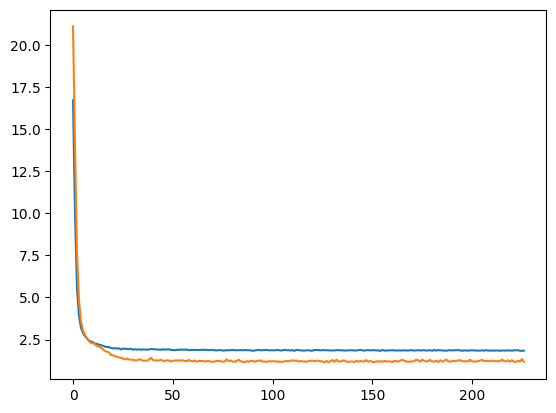

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(4.7969)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-5.0112)


In [21]:
print(vi.h_min_tilde)

-5.704471


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.6474970755261157
tensor([0.9349])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

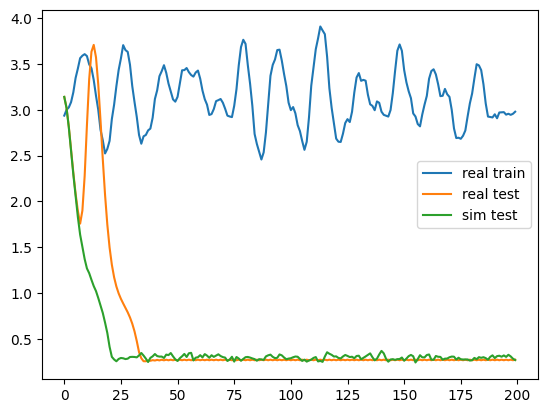

encoder [ 5.194203 -8.      ]
initial_belief tensor([ 5.0871, -0.2902])
real train tensor([ 5.2083, -7.9995])
real test tensor([ 5.0871, -0.2902])
sim tensor([ 5.1926, -7.9962])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


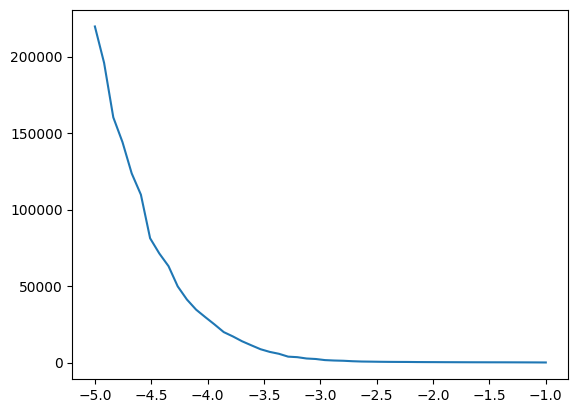

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.250052128302017
tensor([0.1586])
